In [154]:
import ptracer as pt
import numpy as np
from importlib import reload
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [135]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

# Normalisation

In [3]:
a = np.array([
    [0,1,0],
    [0,1,1],
    [1,1,1],
    [-3,0,0],
    [-3,0,-1]
])

In [4]:
[pt.normalize(v) for v in a]

[array([0., 1., 0.]),
 array([0.        , 0.70710678, 0.70710678]),
 array([0.57735027, 0.57735027, 0.57735027]),
 array([-1.,  0.,  0.]),
 array([-0.9486833 ,  0.        , -0.31622777])]

In [5]:
pt.normalize_array(a)

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678],
       [ 0.57735027,  0.57735027,  0.57735027],
       [-1.        ,  0.        ,  0.        ],
       [-0.9486833 ,  0.        , -0.31622777]])

# Basic RF

In [44]:
rf = pt.BasicRF(0, [z for z in range(5)], 3, [1,1,1], 0.5)
print(rf.origins)
print(rf.dirs)
print(rf.weights)
print(rf.wavelength)

[[0. 0. 3.]
 [0. 1. 3.]
 [0. 2. 3.]
 [0. 3. 3.]
 [0. 4. 3.]]
[[0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]]
[0.5 0.5 0.5 0.5 0.5]
600.0


# Scene

In [48]:
scene = pt.Scene(rf, [])
scene.r_origins

array([[0., 0., 3.],
       [0., 1., 3.],
       [0., 2., 3.],
       [0., 3., 3.],
       [0., 4., 3.]])

In [49]:
scene.r_dirs

array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027]])

In [50]:
scene.propagate(1)
scene.r_origins

array([[0.57735027, 0.57735027, 3.57735027],
       [0.57735027, 1.57735027, 3.57735027],
       [0.57735027, 2.57735027, 3.57735027],
       [0.57735027, 3.57735027, 3.57735027],
       [0.57735027, 4.57735027, 3.57735027]])

# Surface

In [213]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [214]:
rf = pt.BasicRF(-1,1,np.linspace(0,2,20),[1,-1,0])
surface = pt.Surface([0,0,0], [0,1,1], n_in=1.5, reflective=False)
scene = pt.Scene(rf, [surface])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


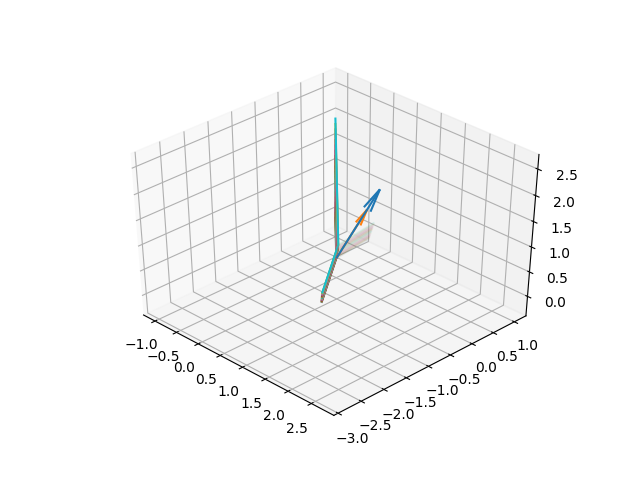

[[0. 0. 0.]]
[[1.48029737e-17 1.34567263e-02 1.34567263e-02]]


In [215]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True)

In [149]:
scene.r_weights

array([1., 1.])

# Spheres

In [216]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [228]:
rf = pt.BasicRF(-1,np.linspace(-1,1,20),np.linspace(-1,1,20),[1,0,0])
sphere = pt.Sphere([0,0,0], 0.5, n_in=1.3)
scene = pt.Scene(rf, [sphere])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


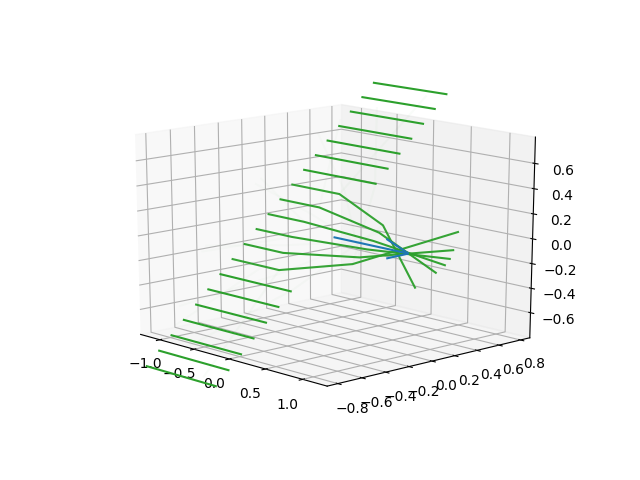

[[0. 0. 0.]]
[[ 1.06592751e-03 -2.52355114e-19 -2.52355114e-19]]


In [229]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True, ray_kwargs={"c":"tab:green"})